## TP5: Topic Modeling

In [2]:
## bib we use
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

In [3]:
# create function clean for cleaning the text before doing topic modeling
def clean(data):
    return ''.join([i if ord(i) < 128 else ' ' for i in data])

# read a csv file, downloaded from KAGGLE
file_path = 'Emotion_classify_Data.csv'
# Open the CSV file and read its contents into a string
with open(file_path, newline='', encoding='utf-8') as csvfile:
    text = csvfile.read()

In [14]:
# Preprocessing data
nlp = spacy.load("en_core_web_sm")

# adding some words to the stopwords
my_stop_words = [u'say', u'\'s', u'Mr', u'be', u'said', u'says', u'saying']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

nlp.max_length = len(text) + 1  # to read the entire file
doc = nlp(clean(text))

Comment,Emotion
i seriously hate one subject to death but now i feel reluctant to drop it,fear
im so full of life i feel appalled,anger
i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it,fear
ive been really angry with r and i feel like an idiot for trusting him in the first place,joy
i feel suspicious if there is no one outside like the rapture has happened or something,fear
i feel jealous becasue i wanted that kind of love the true connection between two souls and i wanted that,anger
when a friend of mine keeps telling me morbid things that happened to his dog,anger
i finally fell asleep feeling angry useless and still full of anxiety,anger
i feel a bit annoyed and antsy in a good way,anger
i feel like i ve regained another vital part of my life which is living,joy
i feel a bit like franz liebkind in the producers not many people know it but the fuhrer was a terrific dancer,joy
i was feeling at the start

In [5]:
# lemmatisation
texts, article, skl_texts = [], [], []
for w in doc:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        # we add to lemmatise version of the word
        article.append(w.lemma_)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        skl_texts.append(' '.join(article))
        texts.append(article)
        article = []

[['comment', 'Emotion'], ['seriously', 'hate', 'subject', 'death', 'feel', 'reluctant', 'drop', 'fear'], ['m', 'life', 'feel', 'appalled', 'anger'], ['sit', 'write', 'start', 'dig', 'feeling', 'think', 'afraid', 'accept', 'possibility', 'fear'], ['have', 'angry', 'r', 'feel', 'like', 'idiot', 'trust', 'place', 'joy'], ['feel', 'suspicious', 'outside', 'like', 'rapture', 'happen', 'fear'], ['feel', 'jealous', 'becasue', 'want', 'kind', 'love', 'true', 'connection', 'soul', 'want', 'anger'], ['friend', 'keep', 'tell', 'morbid', 'thing', 'happen', 'dog', 'anger'], ['finally', 'fall', 'asleep', 'feel', 'angry', 'useless', 'anxiety', 'anger'], ['feel', 'bit', 'annoyed', 'antsy', 'good', 'way', 'anger'], ['feel', 'like', 've', 'regain', 'vital', 'life', 'live', 'joy'], ['feel', 'bit', 'like', 'franz', 'liebkind', 'producer', 'people', 'know', 'fuhrer', 'terrific', 'dancer', 'joy'], ['feel', 'start', 'nt', 'want', 'glad', 'experience', 'glimpse', 'sort', 'vibrant', 'energy', 'gain', 'year', '

In [6]:
# bi_gram
bi_gram = gensim.models.Phrases(texts)
texts = [bi_gram[line] for line in texts]

# faire le dictionnaire pour le bi_gram
dictionary = Dictionary(texts)

# corpus pour bi_gram (combien de fois pour chaque id de mot dans un document)
corpus = [dictionary.doc2bow(text) for text in texts]

# Latent Dirichlet allocation

In [7]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary)
lda_model.show_topics()

[(49,
  '0.101*"feel" + 0.064*"like" + 0.044*"stop" + 0.038*"finish" + 0.036*"fear" + 0.029*"anger" + 0.023*"joy" + 0.020*"serve" + 0.018*"nt" + 0.018*"look"'),
 (30,
  '0.111*"feel" + 0.045*"anger" + 0.044*"like" + 0.039*"fear" + 0.034*"go" + 0.032*"thing" + 0.027*"beat" + 0.024*"consider" + 0.024*"m" + 0.024*"little"'),
 (57,
  '0.072*"feel" + 0.064*"joy" + 0.060*"need" + 0.034*"triumphant" + 0.033*"family" + 0.024*"drink" + 0.023*"s" + 0.020*"belong" + 0.020*"name" + 0.019*"remember"'),
 (25,
  '0.147*"feel" + 0.080*"fear" + 0.078*"insecure" + 0.040*"begin" + 0.031*"reason" + 0.027*"worried" + 0.026*"like" + 0.026*"incredibly" + 0.023*"anger" + 0.023*"creative"'),
 (38,
  '0.106*"feel" + 0.100*"joy" + 0.033*"confident" + 0.033*"sleep" + 0.030*"like" + 0.024*"watch" + 0.020*"anger" + 0.018*"m" + 0.018*"go" + 0.016*"lively"'),
 (0,
  '0.096*"feel" + 0.092*"anger" + 0.046*"m" + 0.042*"particularly" + 0.037*"rebellious" + 0.031*"paper" + 0.028*"feeling" + 0.028*"clean" + 0.028*"little" 

# Latent semantic indexing

In [8]:
lsi_model = LsiModel(corpus=corpus, id2word=dictionary)
lsi_model.show_topics()  # Showing only the top 5 topics

[(0,
  '0.838*"feel" + 0.258*"joy" + 0.257*"anger" + 0.248*"fear" + 0.165*"m" + 0.161*"like" + 0.074*"nt" + 0.053*"know" + 0.052*"want" + 0.049*"time"'),
 (1,
  '-0.715*"anger" + 0.681*"joy" + -0.033*"m" + -0.032*"nt" + 0.031*"fear" + -0.027*"angry" + -0.025*"hate" + -0.022*"irritable" + -0.021*"wrong" + -0.021*"fuck"'),
 (2,
  '-0.806*"fear" + 0.426*"joy" + 0.371*"anger" + 0.077*"like" + -0.031*"strange" + -0.031*"bit" + -0.031*"nervous" + -0.028*"anxious" + -0.027*"afraid" + -0.026*"vulnerable"'),
 (3,
  '-0.972*"m" + 0.176*"feel" + -0.056*"go" + 0.047*"anger" + 0.042*"fear" + -0.040*"like" + -0.037*"feeling" + 0.031*"want" + 0.025*"people" + -0.025*"have"'),
 (4,
  '0.968*"like" + -0.134*"feel" + -0.097*"joy" + -0.079*"anger" + 0.072*"nt" + -0.068*"m" + 0.035*"people" + 0.034*"have" + 0.029*"s" + 0.027*"child"'),
 (5,
  '0.669*"nt" + 0.480*"feeling" + 0.273*"know" + -0.246*"feel" + 0.181*"want" + 0.139*"joy" + 0.118*"fear" + 0.105*"get" + 0.094*"anger" + 0.091*"think"'),
 (6,
  '-0.

# Hierarchical Dirichlet process

In [9]:
hdp_model = HdpModel(corpus=corpus, id2word=dictionary)
hdp_model.show_topics()

[(0,
  '0.013*feel + 0.005*joy + 0.005*fear + 0.004*anger + 0.003*like + 0.003*m + 0.002*nt + 0.002*want + 0.001*have + 0.001*s + 0.001*come + 0.001*twisted + 0.001*bomb + 0.001*yuuki + 0.001*able + 0.001*people + 0.001*leave + 0.001*thing + 0.001*think + 0.001*pronounce'),
 (1,
  '0.008*feel + 0.003*fear + 0.003*anger + 0.003*joy + 0.002*like + 0.002*m + 0.001*s + 0.001*time + 0.001*know + 0.001*thing + 0.001*chance + 0.001*intimated + 0.001*walk_away + 0.001*lit + 0.001*need + 0.001*revovle + 0.001*murmur + 0.001*way + 0.001*denim + 0.001*people'),
 (2,
  '0.007*feel + 0.003*anger + 0.002*joy + 0.002*fear + 0.001*like + 0.001*ebay + 0.001*m + 0.001*chromosome + 0.001*leave + 0.001*ring + 0.001*emm + 0.001*expensive + 0.001*loss + 0.001*spend_time + 0.001*want + 0.001*convince + 0.001*angry + 0.001*hgtv + 0.001*uninhabited + 0.001*poet'),
 (3,
  '0.006*feel + 0.003*joy + 0.002*anger + 0.002*fear + 0.002*m + 0.001*think + 0.001*come + 0.001*excited + 0.001*demonstrate + 0.001*nt_help +

## Observation:
-> As we see, every topic modeling algorithm give as a different list of topics, even the number of the topics is different (unless we define the number).
-> The three algorithms use distinct underlying assumptions and mathematical models.
-> How it works:
#### LDA:
Assumes that documents are mixtures of topics, and topics are mixtures of words. It assigns a probability distribution to each document and each term over a fixed number of topics.
#### LSI :
Represent documents and terms in a lower-dimensional space, capturing latent relationships.
#### HDP :
Assumes an infinite number of topics and allows each document to have a distribution over this infinite set of topics.


## Topic coherence

In [10]:
lda_topics = [[word for word, prob in topic] for topic_id, topic in lda_model.show_topics(formatted=False)]
lsi_topics = [[word for word, prob in topic] for topic_id, topic in lsi_model.show_topics(formatted=False)]
hdp_topics = [[word for word, prob in topic] for topic_id, topic in hdp_model.show_topics(formatted=False)]

In [11]:
lda_coherence = CoherenceModel(topics=lda_topics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lsi_coherence = CoherenceModel(topics=lsi_topics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdp_topics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [12]:
def evaluate_bar_graph(coherences, indices):  # fonction pour tracer le graphe
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

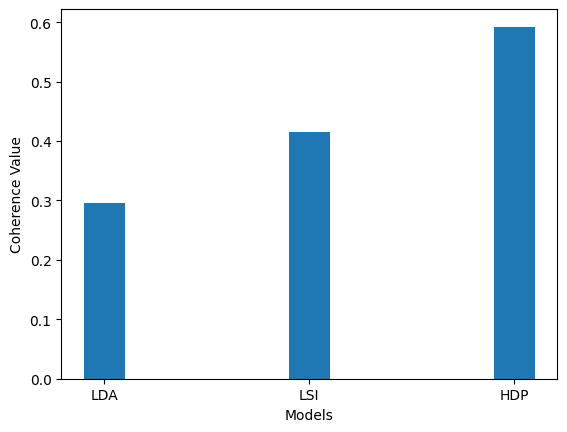

In [13]:
evaluate_bar_graph([lda_coherence, lsi_coherence, hdp_coherence],
                   ['LDA', 'LSI', 'HDP'])

## Observation:
-> HDP model training is the highest between the three models in Coherence Value, which it means that HDP is providing more coherent topics compared to LSI and LDA.
-> Coherence Value can be affected by multiple variables like : number of topics, quality of texts data, preprocessing steps, document length, ... For that the optimal training model varies on each occasion.